# Data Analysis for a new market researcher

In [77]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing the datasets provided with
search=pd.read_csv(r"C:\Users\LENOVO\Documents\today\datasets\searches.csv")

contact=pd.read_csv(r"C:\Users\LENOVO\Documents\today\datasets\contact.csv")

In [80]:
#basic information of the two datasets
print("search")
search.info()
print("\ncontact\n")
contact.info()

search
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35737 entries, 0 to 35736
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ds                    35737 non-null  datetime64[ns]
 1   id_user               35737 non-null  object        
 2   ds_checkin            23888 non-null  datetime64[ns]
 3   ds_checkout           23888 non-null  datetime64[ns]
 4   n_searches            35737 non-null  int64         
 5   n_nights              23888 non-null  float64       
 6   n_guests_min          35737 non-null  int64         
 7   n_guests_max          35737 non-null  int64         
 8   origin_country        35737 non-null  object        
 9   filter_price_min      13322 non-null  float64       
 10  filter_price_max      13322 non-null  float64       
 11  filter_room_types     35737 non-null  object        
 12  filter_neighborhoods  1346 non-null   object        
 13  Length_pr

In [85]:
#Getting the number of null values in both the datasets
print("search\n")
print(search.isnull().sum())
print("\ncontact\n")
print(contact.isnull().sum())

search

ds                          0
id_user                     0
ds_checkin              11849
ds_checkout             11849
n_searches                  0
n_nights                11849
n_guests_min                0
n_guests_max                0
origin_country              0
filter_price_min        22415
filter_price_max        22415
filter_room_types           0
filter_neighborhoods    34391
Length_preparation      11849
dtype: int64

contact

id_guest             0
id_host              0
id_listing           0
ts_contact_at        0
ts_reply_at        604
ts_accepted_at    4196
ts_booking_at     5649
ds_checkin           0
ds_checkout          0
n_guests             0
n_messages           0
id_user              0
dtype: int64


In [8]:
#Data Manipulation
search["ds_checkin"]=search["ds_checkin"].astype("datetime64[ns]")
search["ds_checkout"]=search["ds_checkout"].astype("datetime64[ns]")
search["ds"]=search["ds"].astype("datetime64[ns]")

contact["ds_checkin"]=contact["ds_checkin"].astype("datetime64[ns]")
contact["ds_checkout"]=contact["ds_checkout"].astype("datetime64[ns]")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4068\3146879054.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  contact["ds_checkin"]=contact["ds_checkin"].astype("datetime64[ns]")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_4068\3146879054.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  contact["ds_checkout"]=contact["ds_checkout"].astype("datetime64[ns]")


In [86]:
#creating a columns where guests were in search prior to their actual trip
search["Length_preparation"]=(search["ds_checkin"]-search["ds"]).dt.days

In [87]:
searches=search[search["Length_preparation"]>=0]

In [90]:
search["Length_preparation"].describe()

count    23888.000000
mean       100.577361
std        156.268695
min       -333.000000
25%          6.000000
50%         87.000000
75%        199.000000
max        848.000000
Name: Length_preparation, dtype: float64

In [16]:
search.describe()

,n_searches,n_nights,n_guests_min,n_guests_max,filter_price_min,filter_price_max,Length_preparation
count,35737.000000,23888.000000,35737.000000,35737.000000,13322.000000,1.332200e+04,23888.000000
mean,9.206565,7.672765,1.742955,2.105857,8.470200,9.019063e+07,100.577361
std,17.348746,21.557614,1.460440,1.817358,53.987679,2.978482e+08,156.268695
min,1.000000,0.000000,1.000000,1.000000,0.000000,9.000000e+00,-333.000000
25%,1.000000,2.000000,1.000000,1.000000,0.000000,8.600000e+01,6.000000
50%,4.000000,3.000000,1.000000,2.000000,0.000000,1.390000e+02,87.000000
75%,10.000000,5.000000,2.000000,2.000000,0.000000,3.010000e+02,199.000000
max,448.000000,399.000000,16.000000,16.000000,1250.000000,1.073742e+09,848.000000


# 1. What guests are searching for in Dublin

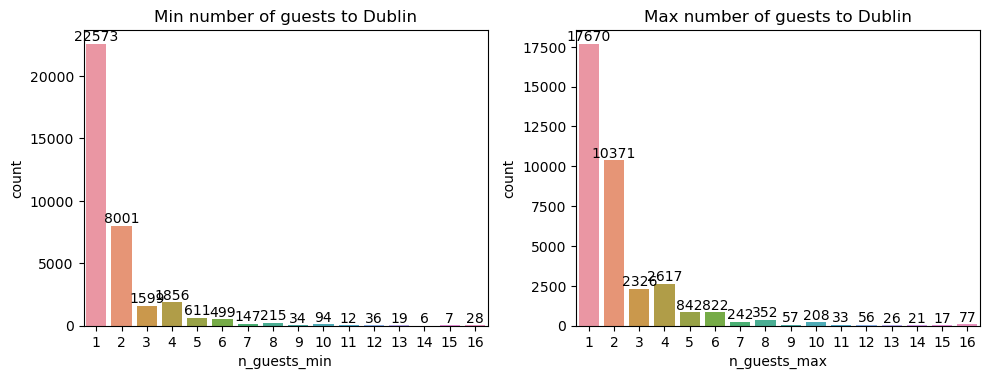

In [17]:
#Count plot for the filter min no. of  guests and max no. of guests are to Dublin
plt.figure(figsize=(10,7))
plt.subplot(221)
a=sns.countplot(search,x="n_guests_min")
for i in a.containers:
    a.bar_label(i)
plt.title("Min number of guests to Dublin")    
    
plt.subplot(222)   
a=sns.countplot(search,x="n_guests_max")
for i in a.containers:
    a.bar_label(i)
plt.title("Max number of guests to Dublin")    
plt.tight_layout()    
plt.show()

In [18]:
#Number of nights most of the guests wants to stay
search["n_nights"].value_counts()

2.0      5121
3.0      4947
1.0      3555
4.0      3091
5.0      1465
         ... 
87.0        1
212.0       1
115.0       1
155.0       1
231.0       1
Name: n_nights, Length: 207, dtype: int64

In [19]:
search["n_nights"].describe()

count    23888.000000
mean         7.672765
std         21.557614
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        399.000000
Name: n_nights, dtype: float64

In [20]:
nights=search.loc[search["n_nights"]<100]
nights

,ds,id_user,ds_checkin,ds_checkout,n_searches,n_nights,n_guests_min,n_guests_max,origin_country,filter_price_min,filter_price_max,filter_room_types,filter_neighborhoods,Length_preparation
0,2014-01-10,0000af0a-6f26-4233-9832-27efbfb36148,2014-09-10,2014-12-10,16,3.0,2,2,IE,0.0,6.700000e+01,",Entire home/apt,Entire home/apt,Private room,...",NaN,243.0
1,2014-01-10,0000af0a-6f26-4233-9832-27efbfb36148,2014-09-10,2014-10-19,3,10.0,1,2,IE,0.0,6.700000e+01,NaN,NaN,243.0
3,2014-01-10,000cd9d3-e05b-4016-9e09-34a6f8ba2fc5,2014-08-11,2014-10-11,11,2.0,1,2,GB,NaN,NaN,",Entire home/apt",NaN,213.0
5,2014-01-10,004e88da-930b-4209-886f-b58f90fdc67e,2014-03-10,2014-05-10,7,2.0,5,5,SE,NaN,NaN,NaN,NaN,59.0
6,2014-01-10,00623353-97d2-43c9-ac02-1adfecf1aca6,2014-01-11,2014-09-11,6,8.0,1,1,IE,NaN,NaN,"Entire home/apt,Entire home/apt,Private room,P...",NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35725,2014-10-14,fec73996-c77a-4879-b644-b9882f1edb8a,2014-06-11,2014-09-11,7,3.0,2,2,GB,0.0,6.050000e+02,",Entire home/apt",NaN,-125.0
35728,2014-10-14,ff052b68-d1c2-461d-bfbf-55563208d1f5,2014-10-18,2014-10-19,96,1.0,2,2,CH,0.0,1.073742e+09,NaN,NaN,4.0
35729,2014-10-14,ff06b374-0e81-4f98-a81c-d3a599b5c224,2014-11-17,2014-11-30,2,13.0,2,2,IT,NaN,NaN,",Private room",NaN,34.0
35731,2014-10-14,ff2cd5cb-7c03-4404-9dd3-2201940da966,2014-11-11,2014-11-15,33,4.0,1,1,FR,NaN,NaN,NaN,NaN,28.0


<Figure size 2000x300 with 0 Axes>

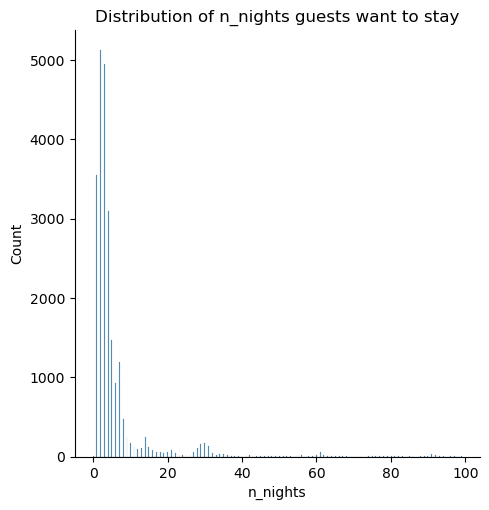

In [21]:
plt.figure(figsize=(20,3))
sns.displot(nights,x="n_nights")
plt.title('Distribution of n_nights guests want to stay')
plt.show()

As per the analysis most of the guests wants to spend in Dublin for 1 or 2 days. Approximately 90% of te guests wants to stay in Dublin for less than 10 days

In [22]:
#Finding guests origin country
origin=search.groupby("origin_country").agg({"origin_country":"count"})
origin.columns=["count"]
origin=origin.sort_values("count",ascending=False)

In [23]:
origin

,count
origin_country,
IE,6608
US,5811
GB,4832
FR,3444
IT,2333
...,...
MC,1
ME,1
MG,1


In [24]:
origin.head(5)

,count
origin_country,
IE,6608
US,5811
GB,4832
FR,3444
IT,2333


In [25]:
origin.tail(5)

,count
origin_country,
MC,1
ME,1
MG,1
MV,1
ZW,1


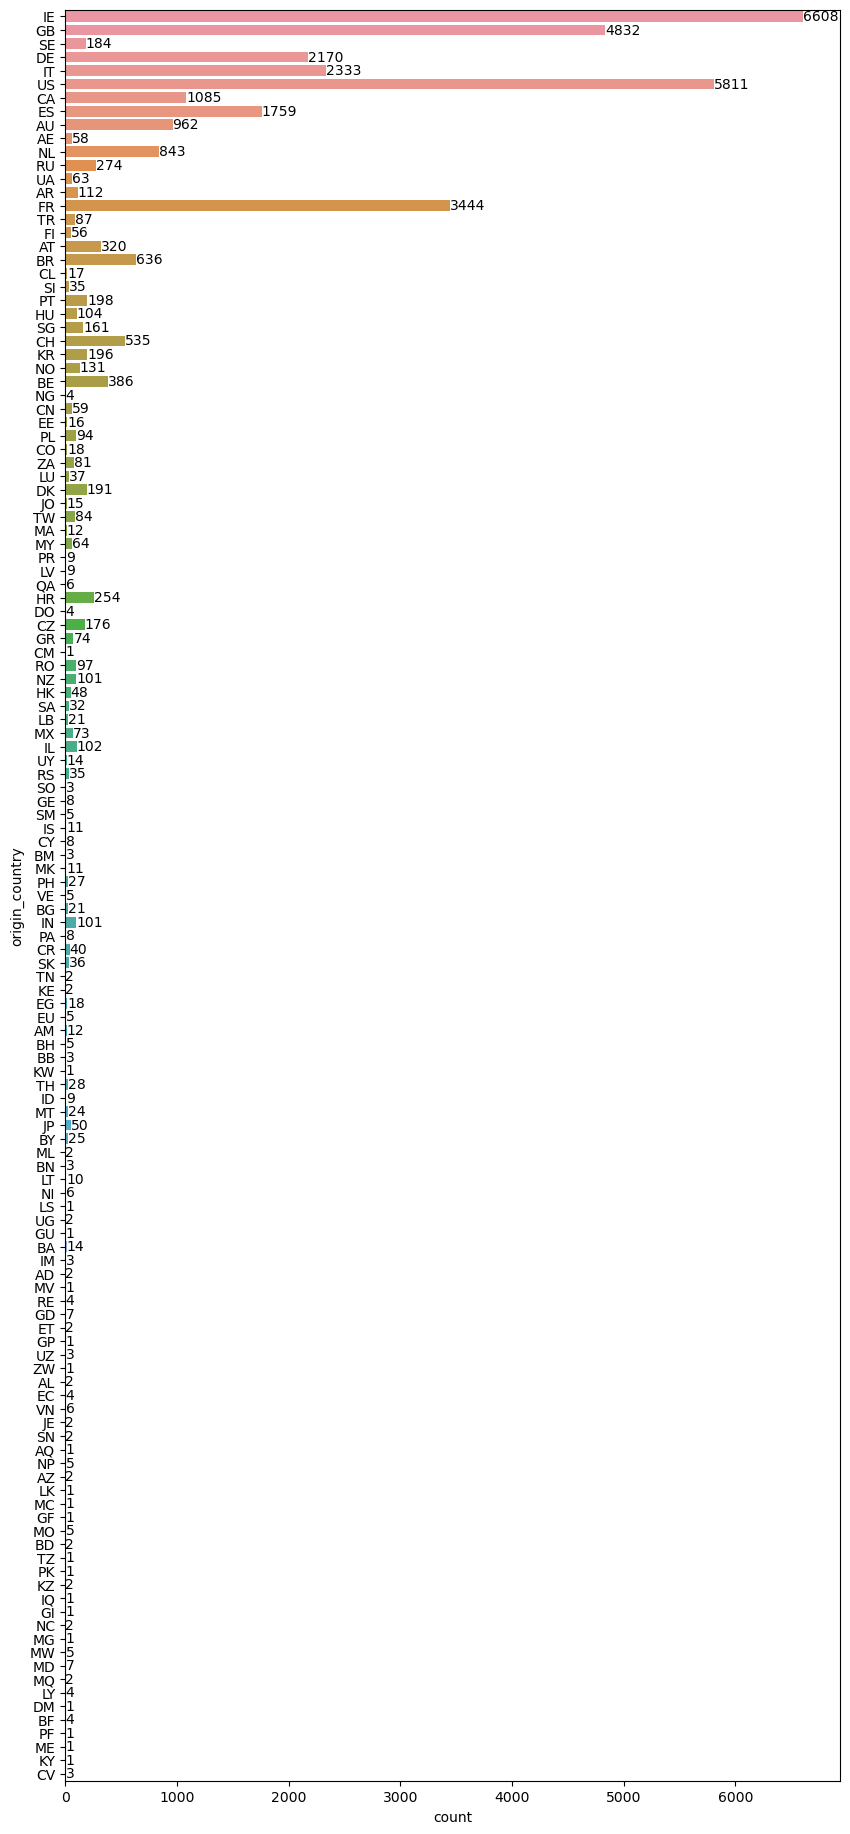

In [26]:
plt.figure(figsize=(10,23))
a=sns.countplot(search,y="origin_country")
for i in a.containers:
    a.bar_label(i)
plt.show()

Guests are from 131 different countries. 
Highest number of guests to Dublin are from country IE(Ireland) followed by US(United States),GB(United Kingdom) ,FR(France) and IT(Italy)

In [28]:
#Filling null values withh Not mentioned in "filter_room_types" column
search["filter_room_types"]=search["filter_room_types"].fillna("Not mentioned")

rooms=search["filter_room_types"].copy().dropna()

room_llist=[]
for sets in rooms:
    for room in sets.split(',' or " ,"):
        room_llist.append(room)
        
df1=pd.DataFrame(room_llist,columns=["type"])
df1.drop(df1[df1["type"]==""].index,inplace=True)

In [29]:
#Finding percantage of types of rooms selected by guests
p=(df1["type"].value_counts()/len(df1))*100
p

Not mentioned      46.042589
Entire home/apt    34.132667
Private room       16.932064
Shared room         2.892679
Name: type, dtype: float64

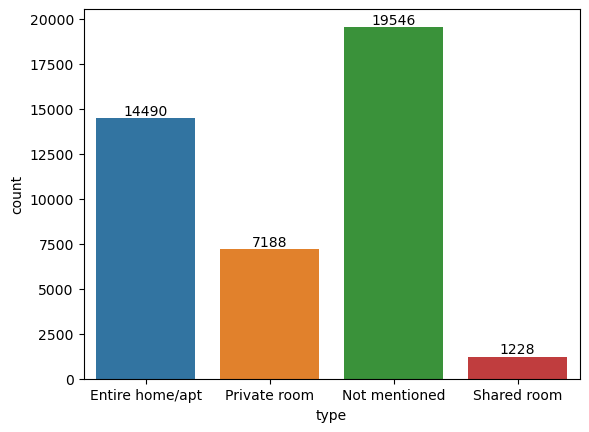

In [30]:
a=sns.countplot(df1,x="type")
for i in a.containers:
    a.bar_label(i)
    
plt.show()    

There exists 4 different types of rooms 
1. Entire home 2.Entire Apartment 3.Private Room 4.Shared room

Maximum guests  haven't mentioned about the room types they want to stay during their search .
Many were okay to stay in Entire home/apt and some of them have choosen private room 

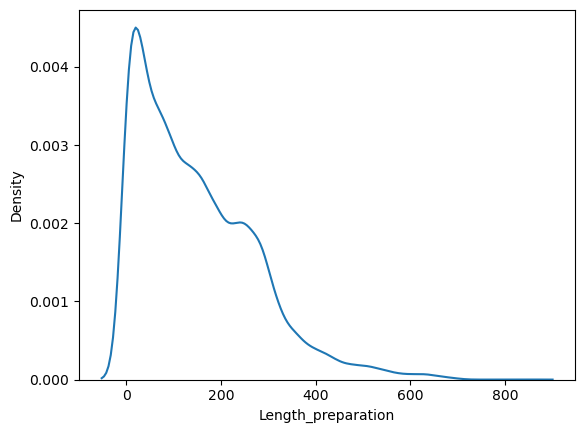

In [31]:
sns.kdeplot(searches,x="Length_preparation")

plt.show()

approximately 50% of Guests were searching to visit Dublin 70 to 100 days prior to their checkin
and apprx 75% of guests were 200 to 220 days prior to their actual trip

# 2. which inquiries hosts tend to accept.

In [32]:
df3=contact.loc[contact["ts_accepted_at"].notna()]

In [33]:
df4=contact.loc[contact["ts_accepted_at"].isna() & contact["ts_reply_at"].notna()]

In [34]:
df5=contact.loc[contact["ts_accepted_at"].isna() & contact["ts_reply_at"].isna()]

In [35]:
print((len(df3)/len(contact))*100,"% got reply and acceptance from host")
print((len(df4)/len(contact))*100,"% got reply but not acceptance from host")
print((len(df5)/len(contact))*100,"% got neiter reply nor acceptance from host")

46.36328774127573 % got reply and acceptance from host
45.91588904512335 % got reply but not acceptance from host
7.72082321360092 % got neiter reply nor acceptance from host


In [36]:
contact["id_guest"].value_counts()

5276da15-2c82-4796-a35a-4148991f0e80    82
996d1871-8986-481b-8bbf-1a1420c68c90    41
5dcd42a3-a2a7-43d7-b5d7-62697a0d548a    34
56dfcfa9-19d5-4234-b156-3e87bb7c4479    30
be8a5e0c-e3fb-4517-a799-e1ed8a05b6e6    28
                                        ..
6cc72d59-485d-4f97-8b31-18843e2dd043     1
6ce15f76-a13d-4225-9312-98b165f4fc99     1
6cf40a53-ee2c-4f55-8543-72982ba6b9c5     1
6d1cb9d7-f3eb-4cc8-8995-18d9bafd9ceb     1
fffea166-9432-43a7-8b1b-09d6f30c1c07     1
Name: id_guest, Length: 3283, dtype: int64

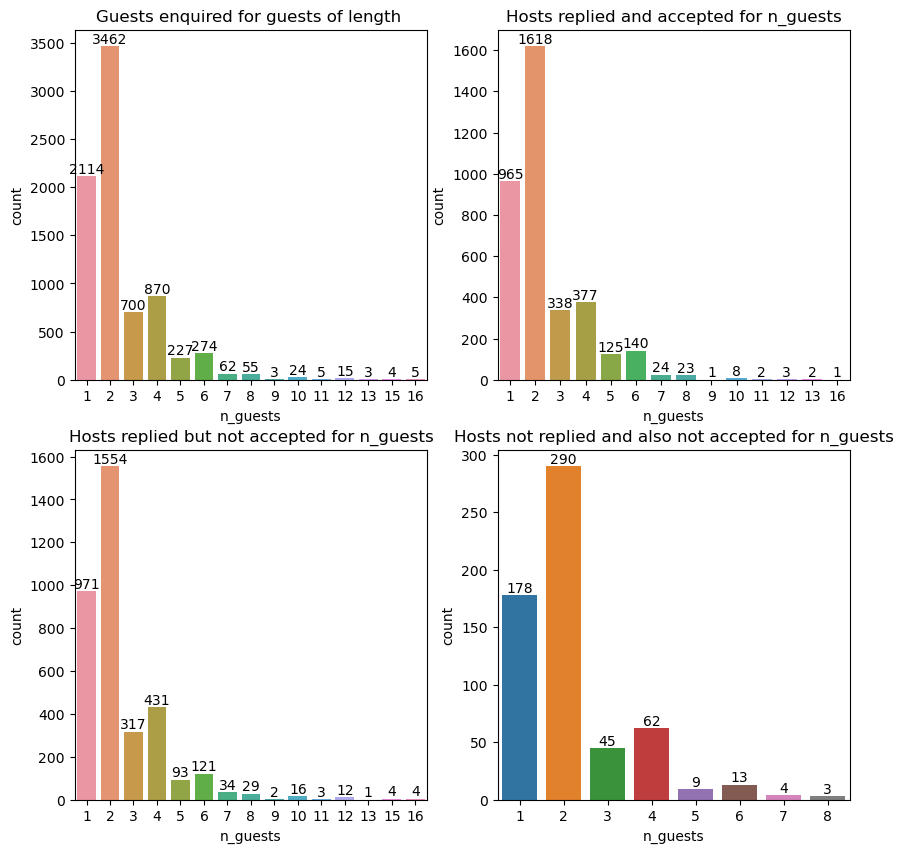

In [37]:
#Plots of different columns from contacts dataset
plt.figure(figsize=(10,10))
plt.subplot(221)
a=sns.countplot(contact,x="n_guests")
for i in a.containers:
    a.bar_label(i)
plt.title("Guests enquired for guests of length ")

plt.subplot(222)
a=sns.countplot(df3,x="n_guests")
for i in a.containers:
    a.bar_label(i)
plt.title("Hosts replied and accepted for n_guests")
    
plt.subplot(223)
a=sns.countplot(df4,x="n_guests")
for i in a.containers:
    a.bar_label(i)
plt.title("Hosts replied but not accepted for n_guests")
plt.subplot(224)
a=sns.countplot(df5,x="n_guests")
for i in a.containers:
    a.bar_label(i)
plt.title("Hosts not replied and also not accepted for n_guests")        
plt.show()

Maximum  n_guests requested by the guests  are one,two and three
where 46.36328774127573 % guests got reply and acceptance from host
45.91588904512335 %  guests got reply but not acceptance from host
7.72082321360092 % guests got neiter reply nor acceptance from host

Text(0.5, 1.0, 'No of messeges sent by guests whose booking was made ')

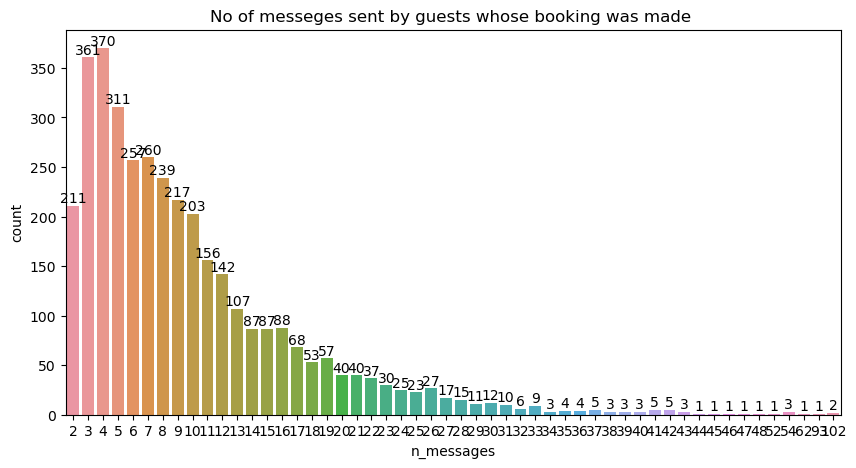

In [38]:
#Count plot of number of messeges sent by guests where the hosts replied and accepted
plt.figure(figsize=(10,5))
a=sns.countplot(df3,x="n_messages")
for i in a.containers:
    a.bar_label(i)
plt.title("No of messeges sent by guests whose booking was made ")

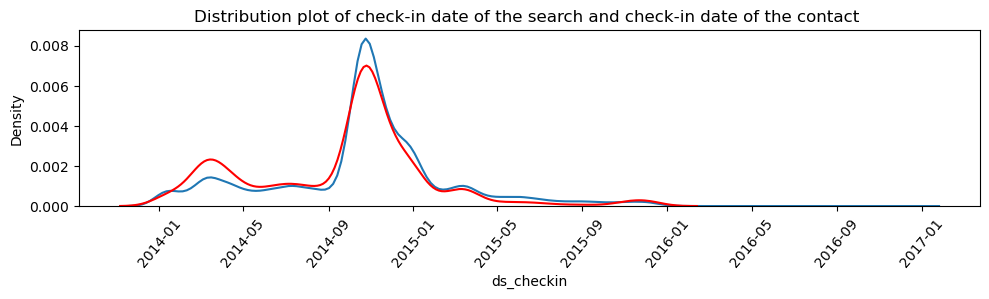

In [40]:
#Distribution plot of check-in date of the search and check-in date of the contact
plt.figure(figsize=(10,5))
plt.subplot(211)
sns.kdeplot(search,x="ds_checkin")
sns.kdeplot(contact,x="ds_checkin",color="Red")
plt.xticks(rotation=50)
plt.title("Distribution plot of check-in date of the search and check-in date of the contact ")

plt.tight_layout()
plt.show()

From both search and contact data, guests were interested to have trip in the month of October,2014


# what the gaps are between guest demand and host supply that the new city manager could plug to increase the number of bookings in Dublin

There is a huge difference in guest demand and host supply
Most of the guests were to choose Entire home/apt or private room which indicates that guests are looking for their individuality. 

In contacts data approximately only 50% of the users accepted for their checkin in Dublin resulting that the hosts
response is playing a major role  in the bookings. Having a potential team to host and reply all the queries made by the guests increase the count of bookings.

As per the data, guests were interested to have trip or vacation in the month of october, providing some additional offers to the guests who want have their trip in the month of October will have a good impact in number of bookings. 

To bridge the gap we can follow the methods:
1. There can be a huge increase in bookings if the hosts increase the no. of private rooms and Entire Home
2. Having a potential team to host and reply all the queries made by the guests increase the count of bookings.
3. Providing some additional offers to the guests who want have their trip in the month of October will have a good impact in number of bookings. 

4. Trips : If the organisers or management provide guests with the information that from Dublin the popular places they can visit along with transportation gives customers a satisfaction on their trip.

# 4.What other data would be useful to have to deepen the analysis and understanding.

A lot of factors were missed which can provide the great analysis to thhe marketer.
The data that can be included to get more analysis and understanding would be:
1. Food : Providing the customers about the type and quality of food available will put great impact on customers which makes them sure that whether they can enjoy the food or not and also feedback on food and food choices selected by the customers will give much analysis.
2. Ratings : Most of the customers will check for ratings during their search. Ratings and reviews on food, cleanliness, service provided from the customers who have already stayed  will provide the great analysis and  have greater impact on upcoming guests and also for the organisers to improve their service and structure.
